/tmp/ipykernel_86536/200740535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_distribution, palette='viridis', orient='v', order=label_distribution['label'])
/tmp/ipykernel_86536/200740535.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(label_distribution["label"], rotation=45, ha='right')  # Set xticks for spacing


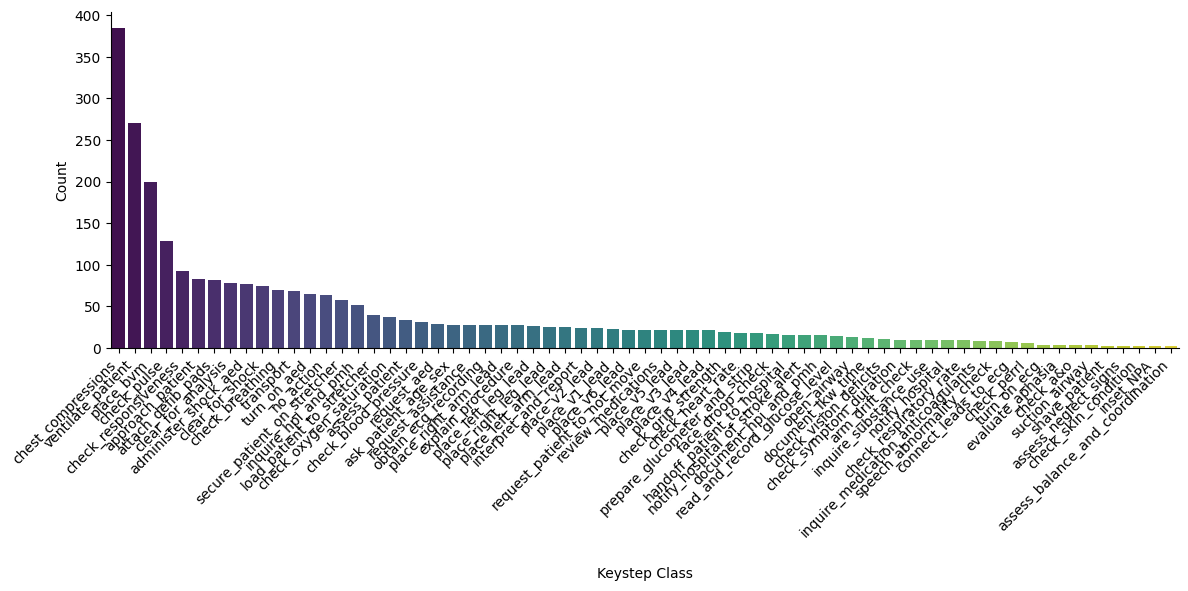

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plot_dir = "./AAAI26_stat_plots/"
# Ensure the plot directory exists
import os
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Load the CSV files
label_distribution = pd.read_csv('./AAAI26_stat_outputs/keystep_distribution_by_label.csv').sort_values(by='count', ascending=False)
class_distribution = pd.read_csv('./AAAI26_stat_outputs/keystep_distribution_by_class_id.csv').sort_values(by='count', ascending=False)
length_stats_by_label = pd.read_csv('./AAAI26_stat_outputs/keystep_length_stats_by_label.csv').sort_values(by='average_length', ascending=False)
length_stats_by_class = pd.read_csv('./AAAI26_stat_outputs/keystep_length_stats_by_class_id.csv').sort_values(by='average_length', ascending=False)

# Plot Keystep Distribution by Label
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='count', data=label_distribution, palette='viridis', orient='v', order=label_distribution['label'])
# plt.title('Keystep Distribution by Label')
plt.xlabel('Keystep Class')
plt.ylabel('Count')
sns.despine()
# Rotate x-axis labels for readability and set spacing
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.labelpad = 20  # Adjust space between bars
plt.gca().set_xticklabels(label_distribution["label"], rotation=45, ha='right')  # Set xticks for spacing

plt.savefig(f"{plot_dir}/keystep_distribution_count.png", dpi=300, bbox_inches='tight')

# Adjust x-axis ticks to display every 2nd label for clarity
plt.tight_layout()
plt.show()



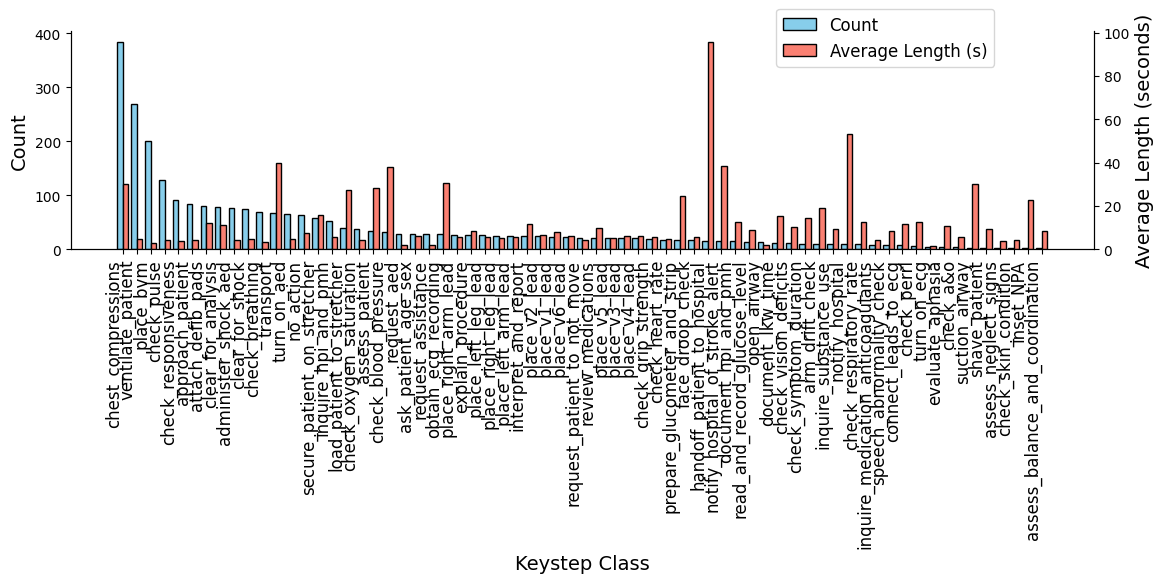

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
label_distribution = pd.read_csv('./AAAI26_stat_outputs/keystep_distribution_by_label.csv').sort_values(by='count', ascending=False)
length_stats_by_label = pd.read_csv('./AAAI26_stat_outputs/keystep_length_stats_by_label.csv').sort_values(by='average_length', ascending=False)

# Merge dataframes on the 'label' column
merged_data = pd.merge(label_distribution, length_stats_by_label, on='label')

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Width of each bar for side-by-side placement
bar_width = 0.4
x = range(len(merged_data))

# Plot count bars on the primary y-axis (left)
ax1.bar([i - bar_width / 2 for i in x], merged_data['count'], width=bar_width, color='skyblue', 
        edgecolor='black', label='Count')
ax1.set_xlabel('Keystep Class', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['label'], rotation=90, ha='right', fontsize=12)
ax1.tick_params(axis='y')

# Plot average length bars on the secondary y-axis (right)
ax2 = ax1.twinx()
ax2.bar([i + bar_width / 2 for i in x], merged_data['average_length'], width=bar_width, color='salmon', 
        edgecolor='black', label='Average Length (s)')
ax2.set_ylabel('Average Length (seconds)', fontsize=14)
ax2.tick_params(axis='y')

# Hide top spine
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add legends for both bars
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 1), fontsize=12)

# Adjust layout and save
plt.tight_layout(pad=2.0)  # Increase padding to avoid cutting off labels
plt.savefig(f"{plot_dir}/keystep_distribution_count_length_side_by_side.png", dpi=600, bbox_inches='tight')
plt.show()


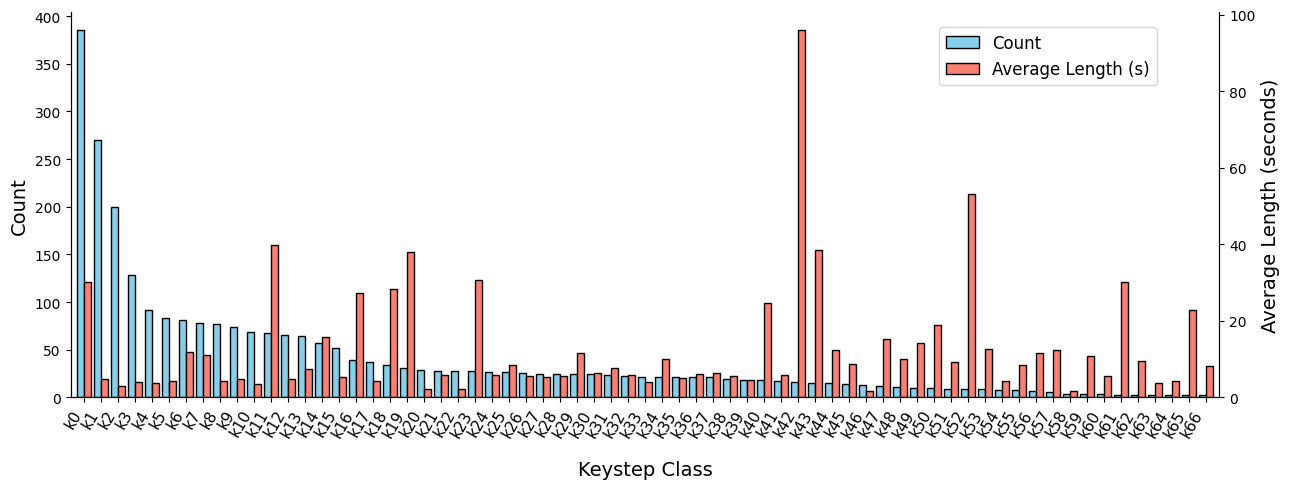

In [3]:
import json 

# Set up the figure
fig, ax1 = plt.subplots(figsize=(13, 5))

# Width of each bar for side-by-side placement
bar_width = 0.4
x = range(len(merged_data))


# Generate a dictionary for renaming x-axis labels
label_mapping = {label: f'k{i}' for i, label in enumerate(merged_data['label'])}

# Save the dictionary as a JSON file
with open(f'{plot_dir}/label_mapping.json', 'w') as json_file:
    json.dump(label_mapping, json_file)

# Plot count bars on the primary y-axis (left)
ax1.bar([i - bar_width / 2 for i in x], merged_data['count'], width=bar_width, color='skyblue', 
        edgecolor='black', label='Count')
ax1.set_xlabel('Keystep Class', fontsize=14, labelpad=15)  # Add padding to x-axis label
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xticks(x)
# Apply new x-axis labels from the dictionary
ax1.set_xticklabels([label_mapping[label] for label in merged_data['label']], rotation=60, ha='right', fontsize=11)
ax1.tick_params(axis='y')

# Plot average length bars on the secondary y-axis (right)
ax2 = ax1.twinx()
ax2.bar([i + bar_width / 2 for i in x], merged_data['average_length'], width=bar_width, color='salmon', 
        edgecolor='black', label='Average Length (s)')
ax2.set_ylabel('Average Length (seconds)', fontsize=14)
ax2.tick_params(axis='y')
ax1.set_xlim(-0.8, len(x) - 0.2)


# Hide top spine
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add legends for both bars
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.95), fontsize=12)

# Adjust layout and save
plt.tight_layout()  # Increase padding to avoid cutting off labels
plt.savefig(f"{plot_dir}/keystep_distribution_count_length_side_by_side.png", dpi=600, bbox_inches='tight')
plt.show()


/tmp/ipykernel_86536/3257520809.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(keysteps))


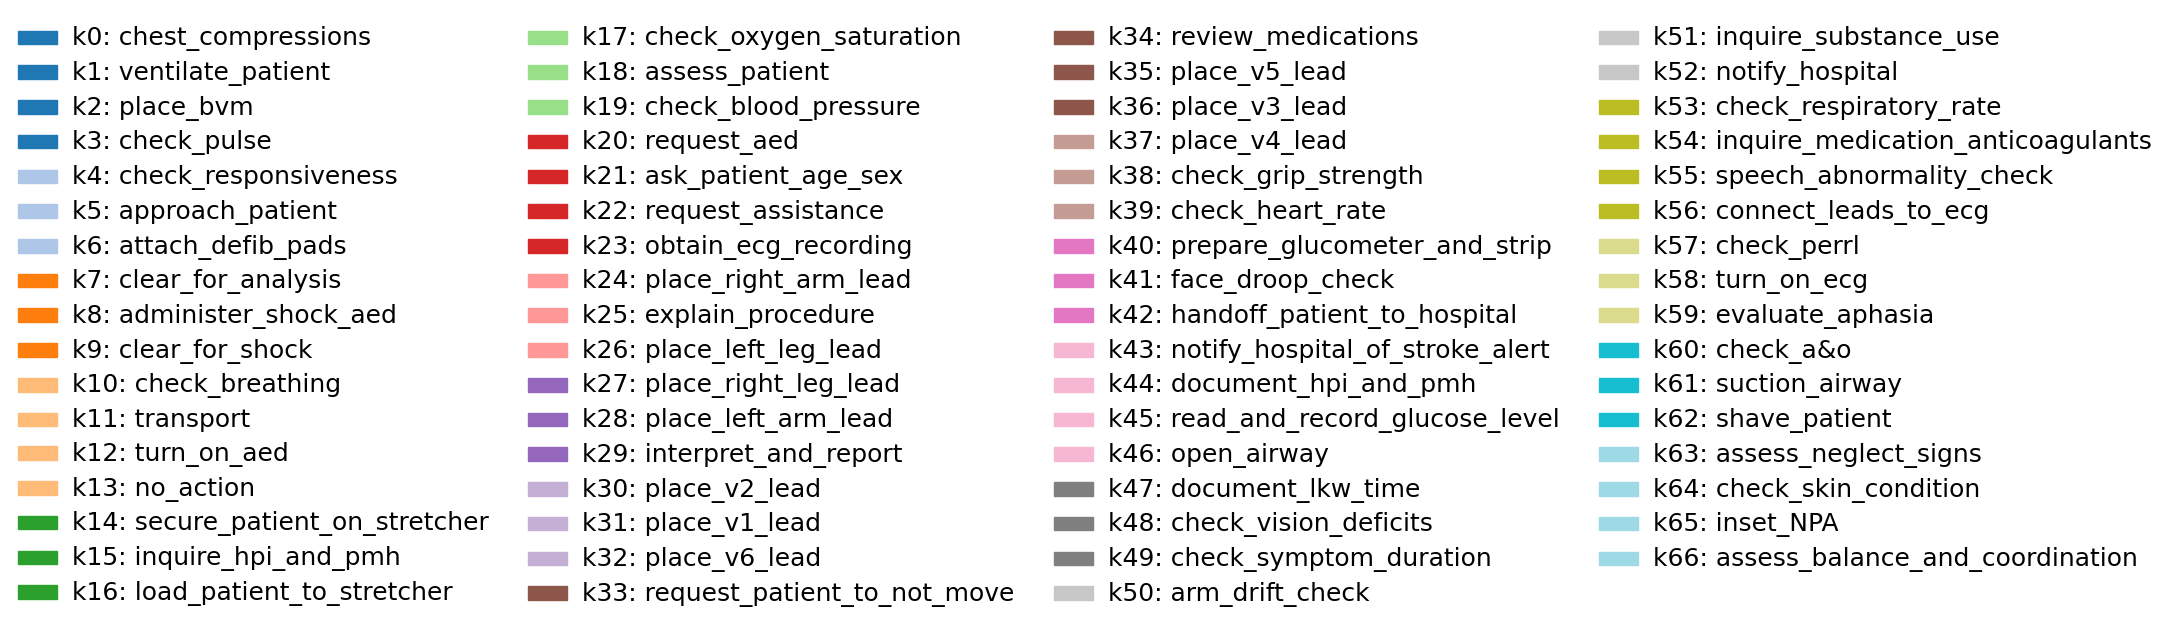

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Example keysteps dictionary
keysteps = label_mapping

# Number of columns for legend
n_cols = 4

# Generate a unique color for each keystep (or use a fixed color list if you want)
cmap = plt.cm.get_cmap('tab20', len(keysteps))
colors = [cmap(i) for i in range(len(keysteps))]

# Create patches
patches = []
for i, (k, v) in enumerate(keysteps.items()):
    patches.append(mpatches.Patch(color=colors[i], label=f"{v}: {k}"))

# Create figure
fig, ax = plt.subplots(figsize=(15, 7))

# Remove axes
ax.axis('off')

# Add legend
legend = ax.legend(handles=patches, ncol=n_cols, loc='center', frameon=False, fontsize=14)

# Force font size for each text object
for text in legend.get_texts():
    text.set_fontsize(18)

# Adjust layout
plt.tight_layout()
plt.savefig(f"{plot_dir}/keystep_legend.png", dpi=600, bbox_inches='tight')
plt.show()


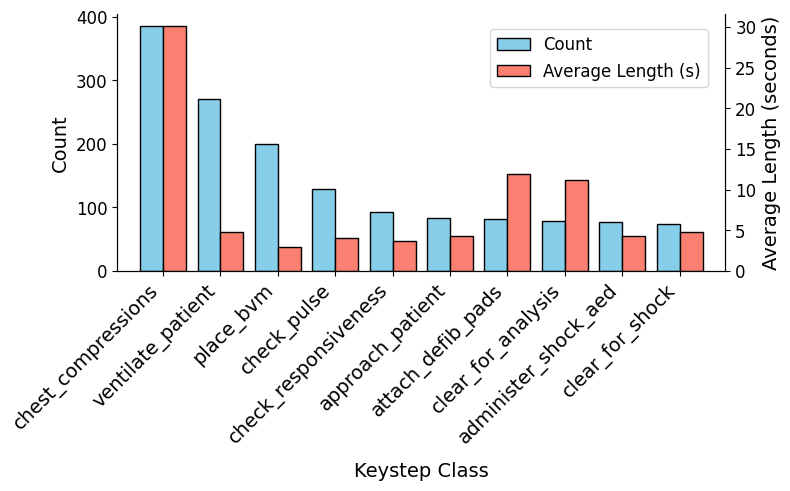

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of top classes to show
top_n = 10

# Sort by count descending
sorted_data = merged_data.sort_values(by='count', ascending=False).reset_index(drop=True)

# Take only top_n classes
top_classes = sorted_data.iloc[:top_n]

# Re-generate x positions
x = range(len(top_classes))

# Width of bars
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(8, 5))

# Count bars (primary y-axis)
ax1.bar([i - bar_width/2 for i in x], top_classes['count'], width=bar_width, color='skyblue', 
        edgecolor='black', label='Count')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)

# Average length bars (secondary y-axis)
ax2 = ax1.twinx()
ax2.bar([i + bar_width/2 for i in x], top_classes['average_length'], width=bar_width, color='salmon', 
        edgecolor='black', label='Average Length (s)')
ax2.set_ylabel('Average Length (seconds)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# X-axis labels — use original labels directly
ax1.set_xlabel('Keystep Class', fontsize=14, labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(top_classes['label'], rotation=45, ha='right', fontsize=14)

# Remove top spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Tight x-limits to reduce padding
ax1.set_xlim(-0.8, len(x) - 0.2)

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.95), fontsize=12)

plt.tight_layout()
plt.savefig(f"{plot_dir}/keystep_distribution_top10_with_length.png", dpi=600, bbox_inches='tight')
plt.show()


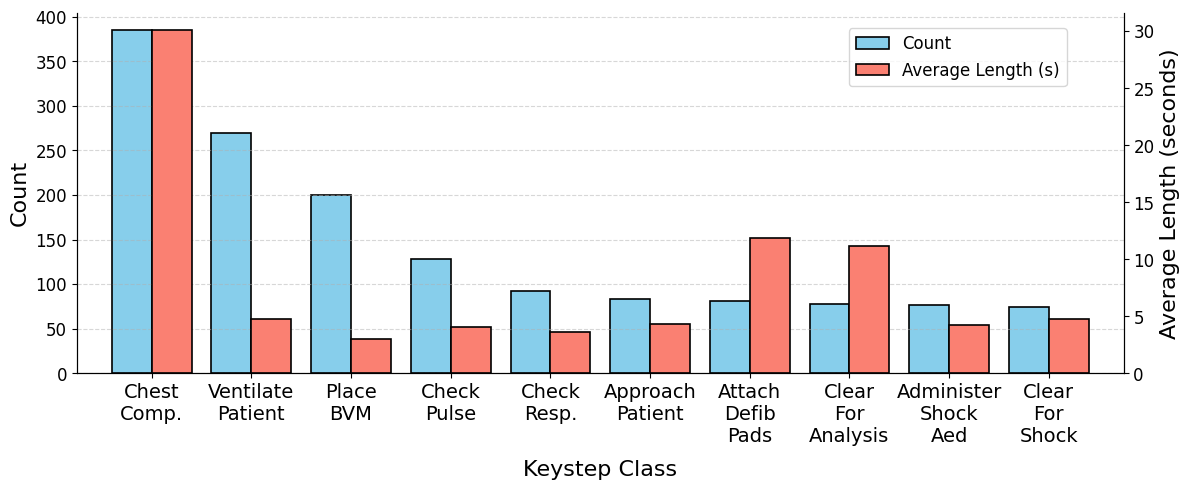

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of top classes to show
top_n = 10

# Sort by count descending
sorted_data = merged_data.sort_values(by='count', ascending=False).reset_index(drop=True)

# Take only top_n classes
top_classes = sorted_data.iloc[:top_n].copy()

# Create prettier labels with line breaks if multiple words
top_classes['label_pretty'] = (
    top_classes['label']
    .str.replace('_', ' ')
    .str.title()
    .apply(lambda s: s.replace(' ', '\n') if ' ' in s else s)
)

# replace "Check Responsiveness" with "Check Resp."
top_classes['label_pretty'] = top_classes['label_pretty'].str.replace('Check\nResponsiveness', 'Check\nResp.')
top_classes['label_pretty'] = top_classes['label_pretty'].str.replace('Chest\nCompressions', 'Chest\nComp.')
top_classes['label_pretty'] = top_classes['label_pretty'].str.replace('Place\nBvm', 'Place\nBVM')

# Re-generate x positions
x = range(len(top_classes))

# Width of bars
bar_width = 0.4
edge_width = 1.2

fig, ax1 = plt.subplots(figsize=(12, 5))

# Count bars (primary y-axis)
ax1.bar([i - bar_width/2 for i in x], top_classes['count'], width=bar_width,
        color='skyblue', edgecolor='black', linewidth=edge_width, label='Count')
ax1.set_ylabel('Count', fontsize=16)
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.grid(True, linestyle='--', alpha=0.5)

# Average length bars (secondary y-axis)
ax2 = ax1.twinx()
ax2.bar([i + bar_width/2 for i in x], top_classes['average_length'], width=bar_width,
        color='salmon', edgecolor='black', linewidth=edge_width, label='Average Length (s)')
ax2.set_ylabel('Average Length (seconds)', fontsize=16)
ax2.tick_params(axis='y', labelsize=12)

# X-axis labels
ax1.set_xlabel('Keystep Class', fontsize=16, labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(top_classes['label_pretty'], rotation=0, ha='center', fontsize=14)

# Remove top spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Tight x-limits
ax1.set_xlim(-0.75, len(x) - 0.25)

# Move legend below
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.95), fontsize=12)

plt.tight_layout()
plt.savefig(f"{plot_dir}/keystep_distribution_top10_with_length.png", dpi=300, bbox_inches='tight')
plt.show()
